The **CRISP-DM Process (Cross Industry Process for Data Mining)**

The lessons leading up to the first project are about helping you go through CRISP-DM in practice from start to finish. Even when we get into the weeds of coding, try to take a step back and realize what part of the process you are in, and assure that you remember the question you are trying answer and what a solution to that question looks like.

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

You can access the code for this lesson (as well as the other lessons in DSND Term 2) in the Github repository here:
    
https://github.com/udacity/DSND_Term2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

df = pd.read_csv('survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

Provide a set of column names that have no missing values.

In [3]:
no_nulls = set(df.columns[~df.isna().any()])#Provide a set of columns with 0 missing values.

Provide a set of column names that have more than 75% if their values missing.

In [4]:
most_missing_cols = set(df.columns[df.isnull().mean() > .75])

Provide a pandas series of the different Professional status values in the dataset along with the count of the number of individuals with each status. Store this pandas series in status_vals. 

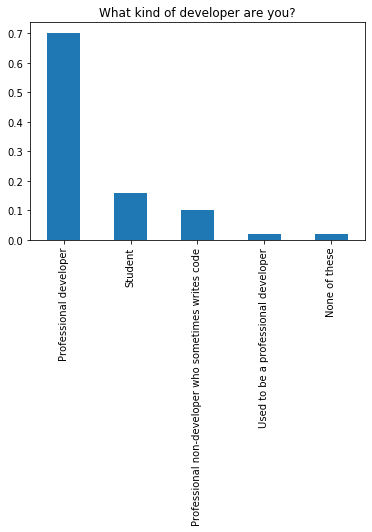

In [5]:
status_vals = df.Professional.value_counts()#Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

Provide a pandas series of the different FormalEducation status values in the dataset along with the count of how many individuals received that formal education. Store this pandas series in ed_vals.

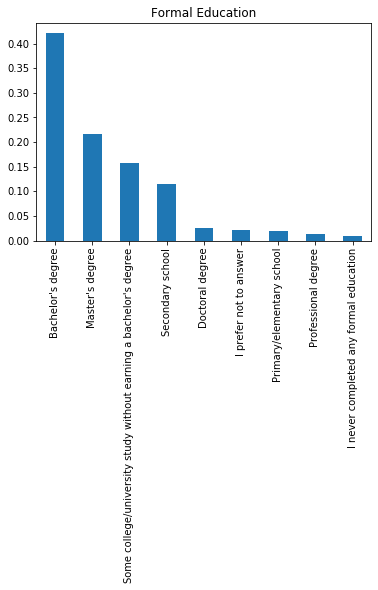

In [6]:
ed_vals = df.FormalEducation.value_counts() #Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

Provide a pandas series of the different Country values in the dataset along with the count of how many individuals are from each country. Store this pandas series in count_vals.

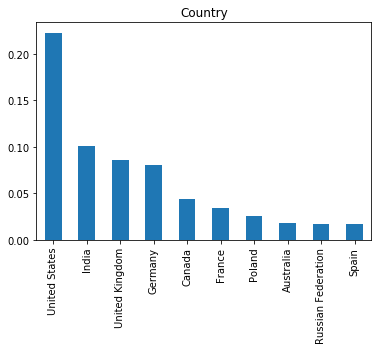

In [7]:
count_vals = df.Country.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

In [8]:
pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])

Salary
Gender FormalEducation                                                 
Female Bachelor's degree                                   60040.908291
       Doctoral degree                                     90623.768006
       I never completed any formal education                       NaN
       I prefer not to answer                              13255.786387
       Master's degree                                     56210.867588
       Primary/elementary school                           32258.064516
       Professional degree                                 45458.307618
       Secondary school                                    41110.162320
       Some college/university study without earning a...  48116.699754
Male   Bachelor's degree                                   57413.518034
       Doctoral degree                                     76872.602904
       I never completed any formal education              43090.588914
       I prefer not to answer                              37629.362623
       Master's degree                                     59156.503938
       Primary/elementary school                           63777.121965
       Professional degree                                 40901.083005
       Secondary school                                    41353.206724
       Some college/university study without earning a...  57262.911063

## Business Questions
How do I break into the field?
<br>What are the placement and salaries of those who attended a coding bootcamp?
<br>How well can we predict an individual's salary? What aspects correlate well to salary?
<br>How well can we predict an individual's job satisfaction? What aspects correlate well to job satisfaction?
## Data Understanding
You will be using the Stackoverflow survey data to get some insight into each of these questions. In the rest of the lesson, you can work along with me to answer these questions, or you can take your own approach to see if the conclusions you draw are similar to those you would find throughout this lesson.

The CRISP-DM Process (Cross Industry Process for Data Mining)
We have now defined the questions we want to answer and had a look through the data available to find the answers, that is, we have looked at the first two steps here:

1. Business Understanding

2. Data Understanding

We can now look at the third step of the process:

3. Prepare Data

Luckily stackoverflow has already collected the data for us. However, we still need to wrangle the data in a way for us to answer our questions. The wrangling and cleaning process is said to take 80% of the time of the data analysis process. You will see that will hold true through this lesson, as a majority of the remaining parts of this lesson will be around basic data wrangling strategies.

We will discuss the advantages and disadvantages of the strategies discussed in this lesson.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to understand how to break into the field, we will look at the CousinEducation field. Use the schema dataset to answer this question. Write a function called get_description that takes the schema dataframe and the column as a string, and returns a string of the description for that column.

In [10]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = schema[schema.Column == column_name].Question.iloc[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description

'Respondent ID number'

In [11]:
#Check your function against solution - you shouldn't need to change any of the below code
descrips = set(get_description(col) for col in df.columns)

The question we have been focused on has been around how to break into the field. Use your get_description function below to take a closer look at the CousinEducation column.

In [12]:
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

Provide a pandas series of the different CousinEducation status values in the dataset. Store this pandas series in cous_ed_vals. If you are correct, you should see a bar chart of the proportion of individuals in each status. If it looks terrible, and you get no information from it, then you followed directions. However, we should clean this up!

In [13]:
cous_ed_vals = df.CousinEducation.value_counts()#Provide a pandas series of the counts for each CousinEducation status

cous_ed_vals # assure this looks right

Take online courses; Buy books and work through the exercises                                         711
Take online courses                                                                                   551
None of these                                                                                         523
Take online courses; Part-time/evening courses; Buy books and work through the exercises              479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises    465
                                                                                                     ... 
Part-time/evening courses; Conferences/meet-ups; Other                                                  1
Bootcamp; Part-time/evening courses; Participate in hackathons; Other                                   1
Get a job as a QA tester; Bootcamp; Buy books and work through the exercises; Other                     1
Master's degree; Get a job as a QA tester; Boo

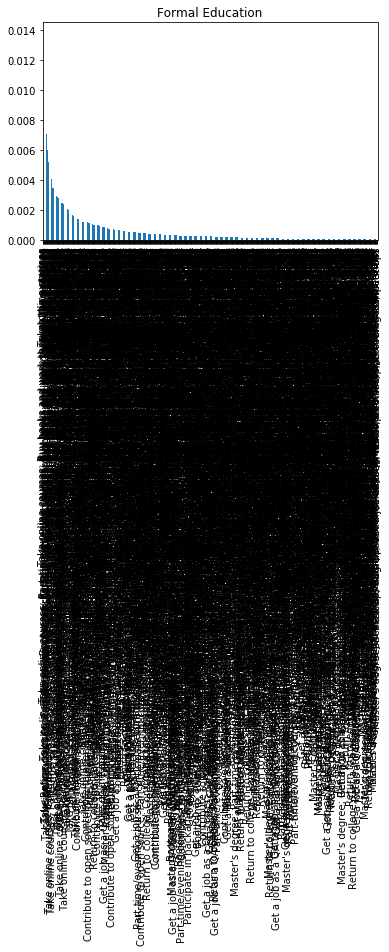

In [14]:
# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(cous_ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

We definitely need to clean this. Above is an example of what happens when you do not clean your data. Below I am using the same code you saw in the earlier video to take a look at the data after it has been cleaned.

In [15]:
from collections import defaultdict

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

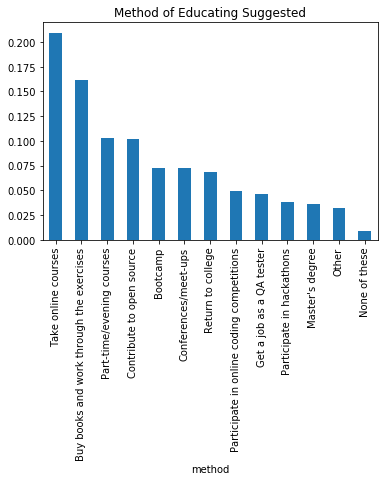

In [16]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

I wonder if some of the individuals might have bias towards their own degrees. Complete the function below that will apply to the elements of the FormalEducation column in df.

In [17]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ["Master's degree", "Doctoral", "Professional degree"]:
        return 1
    else:
        return 0
    

df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    0
2    0
3    0
4    1
Name: FormalEducation, dtype: int64

In [18]:
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()

 Now we would like to find out if the proportion of individuals who completed one of these three programs feel differently than those that did not. Store a dataframe of only the individual's who had HigherEd equal to 1 in ed_1. Similarly, store a dataframe of only the HigherEd equal to 0 values in ed_0.

Notice, you have already created the HigherEd column using the check code portion above, so here you only need to subset the dataframe using this newly created column.

In [19]:
ed_1 = df[df.HigherEd == 1]# Subset df to only those with HigherEd of 1
ed_0 = df[df.HigherEd == 0]# Subset df to only those with HigherEd of 0


print(ed_1['HigherEd'][:5]) #Assure it looks like what you would expect
print(ed_0['HigherEd'][:5]) #Assure it looks like what you would expect

4     1
6     1
7     1
9     1
14    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
3    0
5    0
Name: HigherEd, dtype: int64


In [20]:
#Check your subset is correct - you should get a plot that was created using pandas styling
#which you can learn more about here: https://pandas.pydata.org/pandas-docs/stable/style.html

ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.207892,0.2099,-0.00200857
Buy books and work through the exercises,0.162073,0.161205,0.00086766
Part-time/evening courses,0.103298,0.103248,4.98833e-05
Contribute to open source,0.097821,0.10323,-0.00540923
Bootcamp,0.0746172,0.071824,0.0027932
Return to college,0.0687279,0.0689754,-0.000247487
Conferences/meet-ups,0.0658422,0.0739201,-0.00807796
Master's degree,0.0589517,0.0293459,0.0296058
Get a job as a QA tester,0.0484688,0.0457388,0.00273003


In [21]:
{'Everyone should get a higher level of formal education': False, 
       'Regardless of formal education, online courses are the top suggested form of education': True,
       'There is less than a 1% difference between suggestions of the two groups for all forms of education': False,
       'Those with higher formal education suggest it more than those who do not have it': True}


{'Everyone should get a higher level of formal education': False,
 'Regardless of formal education, online courses are the top suggested form of education': True,
 'There is less than a 1% difference between suggestions of the two groups for all forms of education': False,
 'Those with higher formal education suggest it more than those who do not have it': True}

In [22]:
df["JobSatisfaction"].isnull().mean()

0.21435242839352428

In [23]:
df.groupby(['EmploymentStatus']).mean()[["JobSatisfaction"]]

,JobSatisfaction
EmploymentStatus,
Employed full-time,6.926805
Employed part-time,6.821468
I prefer not to say,NaN
"Independent contractor, freelancer, or self-employed",7.252823
"Not employed, and not looking for work",7.000000
"Not employed, but looking for work",NaN
Retired,NaN


In [24]:
df.groupby(['CompanySize']).mean()[["JobSatisfaction"]].sort_values(by=['JobSatisfaction'])

,JobSatisfaction
CompanySize,
"5,000 to 9,999 employees",6.748153
"10,000 or more employees",6.810345
I don't know,6.842679
500 to 999 employees,6.883661
"1,000 to 4,999 employees",6.884509
100 to 499 employees,6.937089
20 to 99 employees,6.949092
10 to 19 employees,7.000799
Fewer than 10 employees,7.008749


In [25]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d, 
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f
            }


In [26]:
df.groupby(['ProgramHobby']).mean()[["JobSatisfaction"]].sort_values(by=['JobSatisfaction'])

,JobSatisfaction
ProgramHobby,
No,6.833825
"Yes, I program as a hobby",6.913072
"Yes, I contribute to open source projects",7.041535
"Yes, both",7.108041


In [27]:
df.groupby(['HomeRemote']).mean()[["JobSatisfaction"]].sort_values(by=['JobSatisfaction'])

,JobSatisfaction
HomeRemote,
Never,6.632502
It's complicated,6.840830
"More than half, but not all, the time",6.953184
About half the time,6.973702
A few days each month,7.077509
"Less than half the time, but at least one day each week",7.120125
All or almost all the time (I'm full-time remote),7.388430


In [28]:
df.groupby(['FormalEducation']).mean()[["JobSatisfaction"]].sort_values(by=['JobSatisfaction'])

,JobSatisfaction
FormalEducation,
I never completed any formal education,6.833333
Bachelor's degree,6.866363
Master's degree,6.953151
Primary/elementary school,6.956897
I prefer not to answer,7.005682
Some college/university study without earning a bachelor's degree,7.081334
Professional degree,7.087459
Secondary school,7.143082
Doctoral degree,7.348857


In [29]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}

When looking at the first two questions:

How to break into the field?
What are the placement and salaries for those who attended a coding bootcamp?
we did not need to do any predictive modeling. We only used descriptive and a little inferential statistics to retrieve the results.

Therefore, all steps of CRISP-DM were not necessary for these first two questions. CRISP-DM states 6 steps:

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

For these first two questions, we did not need step 4. In the previous notebooks, you performed steps 3 and 5 without needing step 4 at all. A lot of the hype in data science, artificial intelligence, and deep learning is integrated into step 4, but there are still plenty of questions to be answered not using machine learning, artificial intelligence, and deep learning.

All Data Science Problems Involve
1. Curiosity.

2. The right data.

3. A tool of some kind (Python, Tableau, Excel, R, etc.) used to find a solution (You could use your head, but that would be inefficient with the massive amounts of data being generated in the world today).

4. Well communicated or deployed solution.

Extra Useful Tools to Know But That Are NOT Necessary for ALL Projects
- Deep Learning
- Fancy machine learning algorithms
With that, you will be getting a more in depth look at these items, but it is worth mentioning (given the massive amount of hype) that they do not solve all the problems. Deep learning cannot turn bad data into good conclusions. Or bad questions into amazing results.

In the modeling section, you will learn that step three of CRISP-DM is essential to getting the most out of your data. In this case, we are interested in using any of the variables we can from the dataset to predict an individual's salary.

The variables we use to predict are commonly called X (or an X matrix). The column we are interested in predicting is commonly called y (or the response vector).

In this case X is all the variables in the dataset that are not salary, while y is the salary column in the dataset.

On the next page, you will see what happens when we try to use sklearn to fit a model to the data, and we will do some work to get useful predictions out of our sklearn model.



### First Try of Predicting Salary

For the last two questions regarding what are related to relationships of variables with salary and job satisfaction - Each of these questions will involve not only building some sort of predictive model, but also finding and interpretting the influential components of whatever model we build.

To get started let's read in the necessary libraries and take a look at some of our columns of interest.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,HigherEd
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,0
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,0
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,0
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [31]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,HigherEd
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000,51392.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468,0.230697
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829,0.421283
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484,0.000000
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691,0.000000
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806,0.000000
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000,1.000000


In [32]:
a = 40
b = 'HoursPerWeek'
c = 'Salary'
d = 'Respondent'
e = 10
f = 'ExpectedSalary'

desc_sol = {'A column just listing an index for each row': d,
       'The maximum Satisfaction on the scales for the survey': e,
       'The column with the most missing values': f,
       'The variable with the highest spread of values': c}

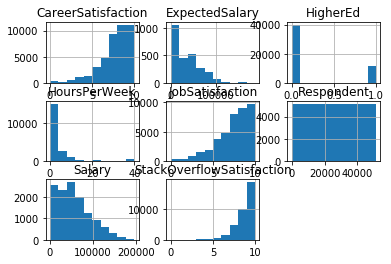

In [33]:
df.hist();

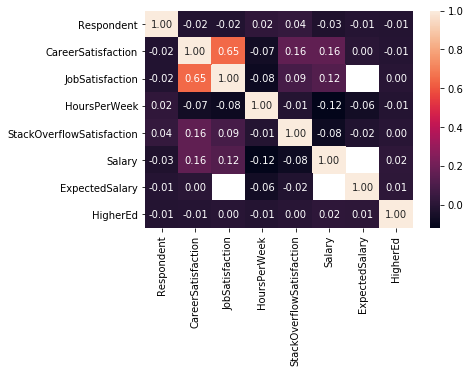

In [34]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [35]:
a = 0.65
b = -0.01
c = 'ExpectedSalary'
d = 'No'
e = 'Yes'
f = 'CareerSatisfaction'
g = -0.15

scatter_sol = {'The column with the strongest correlation with Salary': f,
       'The data suggests more hours worked relates to higher salary': d,
       'Data in the ______ column meant missing data in three other columns': c,
       'The strongest negative relationship had what correlation?': g}

In [36]:
# Consider only numerica variables
X = df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [37]:
a = 'it is a way to assure your model extends well to new data'
b = 'it assures the same train and test split will occur for different users'
c = 'there is no correct match of this question'
d = 'sklearn fit methods cannot accept NAN values'
e = 'it is just a convention people do that will likely go away soon'
f = 'python just breaks for no reason sometimes'

lm_fit_sol = {'What is the reason that the fit method broke?': d,
       'What does the random_state parameter do for the train_test_split function?': b,
       'What is the purpose of creating a train test split?': a}

There are two main 'pain' points for passing data to machine learning models in sklearn:

1. Missing Values
2. Categorical Values

Sklearn does not know how you want to treat missing values or categorical variables, and there are lots of methods for working with each. For this lesson, we will look at common, quick fixes. These methods help you get your models into production quickly, but thoughtful treatment of missing values and categorical variables should be done to remove bias and improve predictions over time.

Three strategies for working with missing values include:

- We can remove (or “drop”) the rows or columns holding the missing values.
- We can impute the missing values.
- We can build models that work around them, and only use the information provided.

## Remove Missing values

Though dropping rows and/or columns holding missing values is quite easy to do using numpy and pandas, it is often not appropriate.

Understanding why the data is missing is important before dropping these rows and columns. In this video you saw a number of situations in which dropping values was not a good idea. These included

1. Dropping data values associated with the effort or time an individual put into a survey.
2. Dropping data values associated with sensitive information.

In either of these cases, the missing values hold information. A quick removal of the rows or columns associated with these missing values would remove missing data that could be used to better inform models.

Instead of removing these values, we might keep track of the missing values using indicator values, or counts associated with how many questions an individual skipped.

In the last video, you saw cases in which dropping rows or columns associated with missing values would not be a good idea. There are other cases in which dropping rows or columns associated with missing values would be okay.

A few instances in which dropping a row might be okay are:

1. Dropping missing data associated with mechanical failures.
2. The missing data is in a column that you are interested in predicting.

Other cases when you should consider dropping data that are not associated with missing data:

1. Dropping columns with no variability in the data.
2. Dropping data associated with information that you know is not correct.

In handling removing data, you should think more about why is this missing or why is this data incorrectly input to see if an alternative solution might be used than dropping the values.

One common strategy for working with missing data is to understand the proportion of a column that is missing. If a large proportion of a column is missing data, this is a reason to consider dropping it.

There are easy ways using pandas to create dummy variables to track the missing values, so you can see if these missing values actually hold information (regardless of the proportion that are missing) before choosing to remove a full column.

#### Removing Values

You have seen:

1. sklearn break when introducing missing values
2. reasons for dropping missing values

It is time to make sure you are comfortable with the methods for dropping missing values in pandas.  You can drop values by row or by column, and you can drop based on whether **any** value is missing in a particular row or column or **all** are values in a row or column are missing.

A useful set of many resources in pandas is available [here](https://chrisalbon.com/).  Specifically, Chris takes a close look at missing values [here](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/).  Another resource can be found [here](https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan).

In [38]:
small_dataset = pd.DataFrame({'col1': [1, 2, np.nan, np.nan, 5, 6], 
                              'col2': [7, 8, np.nan, 10, 11, 12],
                              'col3': [np.nan, 14, np.nan, 16, 17, 18]})

small_dataset

,col1,col2,col3
0,1.0,7.0,NaN
1,2.0,8.0,14.0
2,NaN,NaN,NaN
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


In [39]:
all_drop  = small_dataset.dropna()# Drop any row with a missing value


#print result
all_drop

,col1,col2,col3
1,2.0,8.0,14.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


In [40]:
all_row = small_dataset.dropna(how="all")# Drop only rows with all missing values 


#print result
all_row

,col1,col2,col3
0,1.0,7.0,NaN
1,2.0,8.0,14.0
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


In [41]:
only3_drop = small_dataset.dropna(subset=["col3"])# Drop only rows with missing values in column 3


#print result
only3_drop

,col1,col2,col3
1,2.0,8.0,14.0
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


In [42]:
only3or1_drop = small_dataset.dropna(subset=["col1","col3"])# Drop rows with missing values in column 1 or column 3


#print result
only3or1_drop

,col1,col2,col3
1,2.0,8.0,14.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


In [43]:
#Subset to only quantitative vars
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]


num_vars.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
0,NaN,NaN,0.0,NaN,9.0
1,NaN,NaN,NaN,NaN,8.0
2,113750.0,8.0,NaN,9.0,8.0
3,NaN,6.0,5.0,3.0,10.0
4,NaN,6.0,NaN,8.0,NaN


What proportion of individuals in the dataset reported a salary?

In [44]:
prop_sals = num_vars.Salary.notna().mean()# Proportion of individuals in the dataset with salary reported

prop_sals

0.25083670610211706

Remove the rows associated with nan values in Salary (only Salary) from the dataframe num_vars. Store the dataframe with these rows removed in sal_rem.

In [45]:
sal_rm = num_vars.dropna(subset=["Salary"])# dataframe with rows for nan Salaries removed

sal_rm.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
2,113750.0,8.0,NaN,9.0,8.0
14,100000.0,8.0,NaN,8.0,8.0
17,130000.0,9.0,NaN,8.0,8.0
18,82500.0,5.0,NaN,3.0,NaN
22,100764.0,8.0,NaN,9.0,8.0


Using sal_rm, create X be a dataframe (matrix) of all of the numeric feature variables.

Then, let y be the response vector you would like to predict (Salary).

Run the cell below once you have split the data, and use the result of the code to assign the correct letter to question3_solution.

In [46]:
X = sal_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = sal_rm['Salary']

#Create X using explanatory variables from sal_rm
#Create y using the response variable of Salary

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_model.fit(X_train, y_train)
except:
    print("Oh no! It doesn't work!!!")


Oh no! It doesn't work!!!


It broke because we still have missing values in X

Remove the rows associated with nan values in any column from num_vars (this was the removal process used in the screencast). Store the dataframe with these rows removed in all_rem.

In [48]:
all_rm = num_vars.dropna()# dataframe with rows for nan Salaries removed

all_rm.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
25,175000.000000,7.0,0.0,7.0,9.0
34,14838.709677,10.0,1.0,8.0,10.0
52,15674.203822,6.0,4.0,5.0,8.0
57,43010.752688,10.0,2.0,6.0,10.0
70,65000.000000,8.0,2.0,5.0,7.0


Using all_rm, create X_2 be a dataframe (matrix) of all of the numeric feature variables. Then, let y_2 be the response vector you would like to predict (Salary). Run the cell below once you have split the data, and use the result of the code to assign the correct letter to question5_solution.

In [49]:
X_2 = all_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y_2 = all_rm['Salary']

#Create X using explanatory variables from all_rm
#Create y using Salary from sal_rm

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)
lm_2_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_2_train, y_2_train)
except:
    print("Oh no! It doesn't work!!!")

Now, use lm_2_model to predict the y_2_test response values, and obtain an r-squared value for how well the predicted values compare to the actual test values.

In [50]:
y_test_preds = lm_2_model.predict(X_2_test)# Predictions here using X_2 and lm_2_model
r2_test =  r2_score(y_2_test, y_test_preds)# Rsquared here for comparing test and preds from lm_2_model

# Print r2 to see result
r2_test

0.030994664959115625

Use what you have learned from the second model you fit (and as many cells as you need to find the answers) to complete the dictionary with the variables that link to the corresponding descriptions.

In [61]:
df.dropna(subset=["Salary"]).shape

(12891, 155)

In [62]:
len(y_test_preds)

1602

In [63]:
a = 12891
b = 'Other'
c = 1602
d = 'We still want to predict their salary'
e = 'We do not care to predict their salary'
f = False
g = True

question7_solution = {'The number of reported salaries in the original dataset': a,
                       'The number of test salaries predicted using our model': c,
                       'If an individual does not rate stackoverflow, but has a salary': d,
                       'If an individual does not have a a job satisfaction, but has a salary': d,
                       'Our model predicts salaries for the two individuals described above.': f}
                      
     

## Imputing Missing Values

Imputation is likely the most common method for working with missing values for any data science team. The methods shown here included the frequently used methods of imputing the mean, median, or mode of a column into the missing values for the column.

There are many advanced techniques for imputing missing values including using machine learning and bayesian statistical approaches. This could be techniques as simple as using k-nearest neighbors to find the features that are most similar, and using the values those features have to fill in values that are missing or complex methods like those in the very popular AMELIA library.

Regardless your imputation approach, you should be very cautious of the BIAS you are imputing into any model that uses these imputed values. Though imputing values is very common, and often leads to better predictive power in machine learning models, it can lead to over generalizations. In extremely advanced techniques in Data Science, this can even mean ethical implications. Machines can only 'learn' from the data they are provided. If you provide biased data (due to imputation, poor data collection, etc.), it should be no surprise, you will achieve results that are biased.


### Imputation Methods and Resources

One of the most common methods for working with missing values is by imputing the missing values.  Imputation means that you input a value for values that were originally missing. 

It is very common to impute in the following ways:
1. Impute the **mean** of a column.<br><br>

2. If you are working with categorical data or a variable with outliers, then use the **mode** of the column.<br><br>

3. Impute 0, a very small number, or a very large number to differentiate missing values from other values.<br><br>

4. Use knn to impute values based on features that are most similar.<br><br>

In general, you should try to be more careful with missing data in understanding the real world implications and reasons for why the missing values exist.  At the same time, these solutions are very quick, and they enable you to get models off the ground.  You can then iterate on your feature engineering to be more careful as time permits.

Let's take a look at how some of them work. Chris' content is again very helpful for many of these items - and you can access it [here](https://chrisalbon.com/).  He uses the [sklearn.preprocessing library](http://scikit-learn.org/stable/modules/preprocessing.html).  There are also a ton of ways to fill in missing values directly using pandas, which can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

Create the dataset you will be using for this notebook using the code below.


In [64]:
df = pd.DataFrame({'A':[np.nan, 2, np.nan, 0, 7, 10, 15],
                   'B':[3, 4, 5, 1, 2, 3, 5],
                   'C':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                   'D':[np.nan, True, np.nan, False, True, False, np.nan],
                   'E':['Yes', 'No', 'Maybe', np.nan, np.nan, 'Yes', np.nan]})

df

,A,B,C,D,E
0,NaN,3,NaN,NaN,Yes
1,2.0,4,NaN,True,No
2,NaN,5,NaN,NaN,Maybe
3,0.0,1,NaN,False,NaN
4,7.0,2,NaN,True,NaN
5,10.0,3,NaN,False,Yes
6,15.0,5,NaN,NaN,NaN


In [65]:
a = 'categorical'
b = 'quantitative'
c = 'we cannot tell'
d = 'boolean - can treat either way'

question1_solution = {'Column A is': b,
                      'Column B is': b,
                      'Column C is': c,
                      'Column D is': d,
                      'Column E is': a
                     }

Are there any columns or rows that you feel comfortable dropping in this dataframe?

In [66]:
a = "Yes"
b = "No"

should_we_drop = a


That's right! You should feel comfortable dropping any rows or columns that are completely missing values (or if they are all the exact same value).  However, dropping other columns or rows, even if only containing a few values, should go through further consideration.

 Using new_df, I wrote a lambda function that you can use to impute the mean for the columns of your dataframe using the apply method. Use as many cells as you need to correctly fill in the dictionary impute_q3 to answer a few questions about your findings.

In [67]:
new_df = df.drop(['C'], axis=1)

fill_mean = lambda col: col.fillna(col.mean())

try:
    new_df.apply(fill_mean, axis=0)
except:
    print('That broke...')

That broke...


In [68]:
a = "fills with the mean, but that doesn't actually make sense in this case."
b = "gives an error."
c = "is no problem - it fills the NaN values with the mean as expected."


impute_q3 = {'Filling column A': c,
             'Filling column D': a,
             'Filling column E': b   
}


Nice job! That's right only the first column fills with the mean correctly.  We can't fill the mean of a categorical variable, and the boolean treats the True as 1 and False as 0 to give values that are not 1 or 0.

Given the results above, it might make more sense to fill some columns with the mode. Write your own function to fill a column with the mode value, and use it on the two columns that might benefit from this type of imputation. Use the dictionary impute_q4 to answer some questions about your findings.

In [69]:
#Similar to the above write a function and apply it to compte the mode for each column
#If you get stuck, here is a helpful resource https://stackoverflow.com/questions/42789324/pandas-fillna-mode
new_df = df.drop(['C'], axis=1)

fill_mode = lambda col: col.fillna(col.mode()[0])

try:
    new_df = new_df.apply(fill_mode, axis=0)
except:
    print('That broke...')

In [70]:
new_df.head()

,A,B,D,E
0,0.0,3,False,Yes
1,2.0,4,True,No
2,0.0,5,False,Maybe
3,0.0,1,False,Yes
4,7.0,2,True,Yes


In [71]:
a = "Did not impute the mode."
b = "Imputes the mode."


impute_q4 = {'Filling column A': b,
             'Filling column D': a,
             'Filling column E': a
            }

Nice job! That's right only one of these columns actually imputed a mode.  None of the values in the first column appeared more than once, and 0 was imputed for all of the NaN values.  There were an even number of True and False values, and False was imputed for all the NaN values.

In [72]:
new_df = df.drop(['C'], axis=1)

new_df['A'].fillna(new_df['A'].mean(), inplace=True)
new_df['B'].fillna(new_df['B'].mean(), inplace=True)
new_df['D'].fillna(new_df['D'].mode()[0], inplace=True)
new_df['E'].fillna(new_df['E'].mode()[0], inplace=True)

new_df.head()

,A,B,D,E
0,6.8,3,False,Yes
1,2.0,4,True,No
2,6.8,5,False,Maybe
3,0.0,1,False,Yes
4,7.0,2,True,Yes


#### Imputing Values

You now have some experience working with missing values, and imputing based on common methods.  Now, it is your turn to put your skills to work in being able to predict for rows even when they have NaN values.

First, let's read in the necessary libraries, and get the results together from what you achieved in the previous attempt.

In [74]:
df = pd.read_csv('survey-results-public.csv')

#Only use quant variables and drop any rows with missing values
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
df_dropna = num_vars.dropna(axis=0)

#Split into explanatory and response variables
X = df_dropna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df_dropna['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.030994664959115625 on 1602 values.'

As you may remember from an earlier analysis, there are many more salaries to predict than the values shown from the above code. One of the ways we can start to make predictions on these values is by imputing items into the X matrix instead of dropping them.

Using the num_vars dataframe drop the rows with missing values of the response (Salary) - store this new dataframe in drop_sal_df, then impute the values for all the other missing values with the mean of the column - store this in fill_df.

In [75]:
drop_sal_df = num_vars.dropna(subset=["Salary"]) #Drop the rows with missing salaries

# test look
drop_sal_df.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
2,113750.0,8.0,NaN,9.0,8.0
14,100000.0,8.0,NaN,8.0,8.0
17,130000.0,9.0,NaN,8.0,8.0
18,82500.0,5.0,NaN,3.0,NaN
22,100764.0,8.0,NaN,9.0,8.0


In [76]:
fill_mode = lambda col: col.fillna(col.mean())

fill_df = drop_sal_df.apply(fill_mode) #Fill all missing values with the mean of the column.

# test look
fill_df.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
2,113750.0,8.0,2.64292,9.0,8.000000
14,100000.0,8.0,2.64292,8.0,8.000000
17,130000.0,9.0,2.64292,8.0,8.000000
18,82500.0,5.0,2.64292,3.0,8.511858
22,100764.0,8.0,2.64292,9.0,8.000000


 Using fill_df, predict Salary based on all of the other quantitative variables in the dataset. You can use the template above to assist in fitting your model:

- Split the data into explanatory and response variables
- Split the data into train and test (using seed of 42 and test_size of .30 as above)
- Instantiate your linear model using normalized data
- Fit your model on the training data
- Predict using the test data
- Compute a score for your model fit on all the data, and show how many rows you predicted for

In [77]:
#Split into explanatory and response variables
y = fill_df["Salary"]
X = fill_df.drop(["Salary"],axis=1)  
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds) #r2_score
length_y_test = len(y_test)#num in y_test

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.04072431792894726 on 3868 values.'

Notice that in the earlier video in the pre-requisites, there was a mention of dropping a column to assure your X matrix is full rank. This is not true using LinearRegression within sklearn, because there is a ridge (or L2 penalty used by default). However, dropping the columns would also be okay, it is just not required, as it is with OLS without a penalty.

You will see this holds true in the upcoming content.

#### Categorical Variables

One of the main ways for working with categorical variables is using 0, 1 encodings.  In this technique, you create a new column for every level of the categorical variable.  The **advantages** of this approach include:

1. The ability to have differing influences of each level on the response.
2. You do not impose a rank of the categories.
3. The ability to interpret the results more easily than other encodings.

The **disadvantages** of this approach are that you introduce a large number of effects into your model.  If you have a large number of categorical variables or categorical variables with a large number of levels, but not a large sample size, you might not be able to estimate the impact of each of these variables on your response variable.  There are some rules of thumb that suggest 10 data points for each variable you add to your model.  That is 10 rows for each column.  This is a reasonable lower bound, but the larger your sample (assuming it is representative), the better.

Let's try out adding dummy variables for the categorical variables into the model.  We will compare to see the improvement over the original model only using quantitative variables.  


#### Run the two cells below to get started.

In [78]:
#Only use quant variables and drop any rows with missing values
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]

#Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.04072431792894726 on 3868 values.'